## Задача 1
- Прочитай файл 'marketing_mix.csv'
- Приведи дату к формату '2024-01-01'
- Приведи датафрейм к формату Дата, Источник, Доход
- Удали дубликаты по столбцам Дата, Источник
- Добавь столбец OS, если источник TikTok и Facebook, то 'Android', если Google Ads, то 'IOS', если Sales, то 'WEB'
- Сделай сводную: Динамика дохода по источникам по годам
- Выведи в удобный формат в Excel

In [1]:
# импортируем необходимые библиотеки
import os
import warnings
import requests
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [1]:
# задаем количество знаков после запятой для всех значений в датафрейме
pd.set_option("float_format", "{:.2f}".format)

# задаем общее оформление графиков и настройки масштаба элементов
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={"figure.figsize": (10, 5)})
sns.set_palette("pastel")

# игнорируем предупреждения о возможных изменениях работы фуфнкций в будущих версиях
warnings.filterwarnings("ignore")

# настраиваем отображение графиков в ячейке с кодом, а не в новом окне
%matplotlib inline

### Читаем файл `marketing_mix.csv`,  приводим дату к формату *"2024-01-01"*

In [2]:
# функция для загрузки данных
def dawnload_df_csv(local_file: str, date_column: str) -> pd.DataFrame:
    """Функция для загрузки данных из файла csv.
    
    ---parameters---
    На вход ожидает 2 параметра:
    local_file - путь к локальному файлу csv в формате str
    date_column - название колонки для парсинга даты в формате str.
    
    Функция проверят существование полученного пути в файловой системе.
    Если local_file ссылается на существующий путь, 
    то функция загружает данные, парсит даты и возвращает датасет.    
    В случае ошибки функция печатает сообщение об ошибке загрузки данных.
    
    ---return---
    df_local_file - загруженный датасет
    """
    # проверяем корректность пути к локальному файлу
    if os.path.exists(local_file):
        # загружаем датасет
        df_local_file = pd.read_csv(
            local_file,
            parse_dates=[date_column]  # парсим даты
        )
        print("Датасет успешно загружен")

        return df_local_file
    else:
        print("Ошибка при загрузке датасета. Проверь передаваемые аргументы.")

In [3]:
# сохраняем путь к файлу csv
local_file = "C:/Users/enygi/DS/Test/MGCOM/marketing_mix.csv"
# определяем колонку в датасете с информацией о дате для парсинга
date_column = "Date"

# загружаем данные
df_marketing_mix = dawnload_df_csv(local_file, date_column)

Датасет успешно загружен


In [4]:
# функция для первичного знакомства с данными
def df_info(df):
    """Фукция для вывода на экран различной информации
    по датасету для первичного знакомства с данными.
    Принимает на вход датасет и выводит пять случайных наблюдений,
    описательную статистику, общую информацию, количество уникальных значений,
    пропусков и дубликатов.
    """
    # задаем разделитель
    custom_separator = "\n\n"

    # выводим размер датасета
    print("\n\033[1mРазмер датасета \033[0m")
    print(f"Датасет состоит из {df.shape[0]} наблюдений и {df.shape[1]} признаков")
    print(custom_separator)

    # выводим 10 первых наблюдений
    print("\n\033[1mДесять первых наблюдений \033[0m")
    display(df.head(10)) 
    
    # выводим 10 случайных наблюдений
    print("\n\033[1mДесять случайных наблюдений \033[0m")
    display(df.sample(10))
    
    # выводим 10 последних наблюдений
    print("\n\033[1mДесять последних наблюдений \033[0m")
    display(df.tail(10))
    print(custom_separator) 

    # выводим общую информацию
    print("\033[1mОбщая информация \033[0m")
    df.info()
    print(custom_separator)

    # выводим описательную статистику
    print("\033[1mОписательная статистика \033[0m")
    display(df.describe())
    print(custom_separator)

    # выводим количество уникальных значений в каждом признаке
    print("\033[1mКоличество уникальных значений в каждом признаке \033[0m")
    display(df.nunique(axis=0))
    print(custom_separator)

    # проверяем наличие пропусков
    if df.isna().sum().sum() > 0:
        print(
            f"""\033[1mВ датасете {df.isna().sum().sum()} пропусков \033[0m
{df.isna().sum()}"""
        )
        print(custom_separator)
    else:
        print(f"\033[1mВ датасете нет пропусков \033[0m\n")

    # проверяем наличие дубликатов
    if df.duplicated().sum() > 0:
        print(f"\033[1mВ датасете {df.duplicated().sum()} дубликата \033[0m")
    else:
        print(f"\033[1mВ датасете нет дубликатов \033[0m")

In [5]:
# знакомимся с датасетом df_marketing_mix
df_info(df_marketing_mix)


Размер датасета 
Датасет состоит из 200 наблюдений и 5 признаков




Десять первых наблюдений 


,Date,TikTok,Facebook,Google Ads,Sales
0,2018-01-07,13528.10,0.00,0.00,9779.80
1,2018-01-14,0.00,5349.65,2218.93,13245.19
2,2018-01-21,0.00,4235.86,2046.96,12022.66
3,2018-01-28,0.00,3562.21,0.00,8846.95
4,2018-02-04,0.00,0.00,2187.29,9797.07
5,2018-02-11,8045.44,4310.55,1992.98,13527.65
6,2018-02-18,0.00,0.00,2253.02,9635.43
7,2018-02-25,9697.29,4478.81,2042.30,15355.11
8,2018-03-04,0.00,3156.93,1859.02,12199.37
9,2018-03-11,0.00,4522.03,2135.99,11368.23



Десять случайных наблюдений 


,Date,TikTok,Facebook,Google Ads,Sales
101,2019-12-15,7304.48,4889.61,1921.76,12947.48
177,2021-05-30,0.00,0.00,1641.15,7715.63
122,2020-05-10,10596.48,0.00,0.00,10804.46
172,2021-04-25,0.00,0.00,2139.88,10895.22
59,2019-02-24,0.00,0.00,2053.14,7848.26
136,2020-08-16,0.00,5862.60,0.00,11189.87
159,2021-01-24,0.00,0.00,2034.50,7885.48
42,2018-10-28,6587.46,5567.29,0.00,12235.08
8,2018-03-04,0.00,3156.93,1859.02,12199.37
77,2019-06-30,8842.30,5093.95,1986.57,15624.56



Десять последних наблюдений 


,Date,TikTok,Facebook,Google Ads,Sales
190,2021-08-29,7414.29,0.00,2186.08,14669.40
191,2021-09-05,10534.10,0.00,1964.94,13843.33
192,2021-09-12,0.00,5213.48,1715.62,14024.53
193,2021-09-19,7663.81,0.00,2399.59,13315.79
194,2021-09-26,0.00,4757.98,0.00,10237.24
195,2021-10-03,0.00,0.00,1691.68,9030.17
196,2021-10-10,11543.58,4615.35,2518.88,15904.11
197,2021-10-17,0.00,4556.16,1919.19,12839.29
198,2021-10-24,0.00,0.00,1707.65,9063.45
199,2021-10-31,0.00,0.00,1863.31,7250.21





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        200 non-null    datetime64[ns]
 1   TikTok      200 non-null    float64       
 2   Facebook    200 non-null    float64       
 3   Google Ads  200 non-null    float64       
 4   Sales       200 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.9 KB



Описательная статистика 


,Date,TikTok,Facebook,Google Ads,Sales
count,200,200.00,200.00,200.00,200.00
mean,2019-12-04 12:00:00,2946.21,2213.59,1520.72,10668.14
min,2018-01-07 00:00:00,0.00,0.00,0.00,4532.33
25%,2018-12-21 06:00:00,0.00,0.00,1657.19,8396.94
50%,2019-12-04 12:00:00,0.00,0.00,1918.99,10853.10
75%,2020-11-16 18:00:00,7938.53,4624.03,2069.77,12566.99
max,2021-10-31 00:00:00,13901.55,7696.22,2518.88,17668.34
std,NaN,4749.65,2505.97,870.76,2700.71





Количество уникальных значений в каждом признаке 


Date          200
TikTok         59
Facebook       93
Google Ads    153
Sales         200
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


### Приводим датафрейм к формату Дата, Источник, Доход

In [6]:
# преобразуем данные из широкого формата в длинный
# с помощью метода pd.melt
df_marketing_mix_melted = pd.melt(
    df_marketing_mix, 
    id_vars=['Date'],        # определяем в качестве переменной идентификатора
    var_name="Источник",     # определяем новое имя столбца с признаком
    value_name="Доход",      # определяем новое имя столбца со значением
).rename(
    columns={'Date': 'Дата'} # определяем новое имя для столбца с датой
).sort_values(
    by=['Дата'], 
    ascending=True,          # сортируем по дате в порядке возрастания
).reset_index(drop=True)     # сбрасываем индекс

In [7]:
# смотрим результат
df_info(df_marketing_mix_melted)


Размер датасета 
Датасет состоит из 800 наблюдений и 3 признаков




Десять первых наблюдений 


,Дата,Источник,Доход
0,2018-01-07,TikTok,13528.10
1,2018-01-07,Facebook,0.00
2,2018-01-07,Sales,9779.80
3,2018-01-07,Google Ads,0.00
4,2018-01-14,Sales,13245.19
5,2018-01-14,TikTok,0.00
6,2018-01-14,Facebook,5349.65
7,2018-01-14,Google Ads,2218.93
8,2018-01-21,Facebook,4235.86
9,2018-01-21,Sales,12022.66



Десять случайных наблюдений 


,Дата,Источник,Доход
748,2021-08-08,TikTok,0.00
604,2020-11-29,Google Ads,0.00
499,2020-05-24,Sales,13038.94
607,2020-11-29,TikTok,0.00
255,2019-03-24,Sales,8193.65
651,2021-02-14,Facebook,5895.26
498,2020-05-24,Facebook,0.00
485,2020-05-03,Sales,11735.10
128,2018-08-19,Facebook,0.00
606,2020-11-29,Sales,4532.33



Десять последних наблюдений 


,Дата,Источник,Доход
790,2021-10-17,TikTok,0.00
791,2021-10-17,Facebook,4556.16
792,2021-10-24,Google Ads,1707.65
793,2021-10-24,Sales,9063.45
794,2021-10-24,Facebook,0.00
795,2021-10-24,TikTok,0.00
796,2021-10-31,Facebook,0.00
797,2021-10-31,TikTok,0.00
798,2021-10-31,Google Ads,1863.31
799,2021-10-31,Sales,7250.21





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Дата      800 non-null    datetime64[ns]
 1   Источник  800 non-null    object        
 2   Доход     800 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 18.9+ KB



Описательная статистика 


,Дата,Доход
count,800,800.00
mean,2019-12-04 12:00:00,4337.16
min,2018-01-07 00:00:00,0.00
25%,2018-12-21 06:00:00,0.00
50%,2019-12-04 12:00:00,2073.53
75%,2020-11-16 18:00:00,8213.36
max,2021-10-31 00:00:00,17668.34
std,NaN,4776.99





Количество уникальных значений в каждом признаке 


Дата        200
Источник      4
Доход       503
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


### Удаляем дубликаты по столбцам Дата, Источник

In [8]:
# проверяем наличие неявных дубликатов
duplicated_sum = df_marketing_mix_melted[["Дата", "Источник"]].duplicated().sum()

if duplicated_sum > 0:
    print(f"В датасете {duplicated_sum} дубликатов")
else:
    print(f"В датасете нет дубликатов")

В датасете нет дубликатов


### Добавляем столбец OS, если источник TikTok и Facebook, то 'Android', если Google Ads, то 'IOS', если Sales, то 'WEB'

In [9]:
# создаем словарь соответствия источников операционным системам
os_dict = {
    "TikTok": "Android",
    "Facebook": "Android",
    "Google Ads": "IOS",
    "Sales": "WEB"
}

In [10]:
# добавляем столбец "OS" по заданному условию
# на основе соответствия значения столбца "Источник" (ключ) значению словаря os_dict
df_marketing_mix_melted["OS"] = df_marketing_mix_melted["Источник"].map(os_dict)

In [11]:
# проверяем корректность добавления нового столбца
df_marketing_mix_melted.head(10)

,Дата,Источник,Доход,OS
0,2018-01-07,TikTok,13528.10,Android
1,2018-01-07,Facebook,0.00,Android
2,2018-01-07,Sales,9779.80,WEB
3,2018-01-07,Google Ads,0.00,IOS
4,2018-01-14,Sales,13245.19,WEB
5,2018-01-14,TikTok,0.00,Android
6,2018-01-14,Facebook,5349.65,Android
7,2018-01-14,Google Ads,2218.93,IOS
8,2018-01-21,Facebook,4235.86,Android
9,2018-01-21,Sales,12022.66,WEB


### Делаем сводную: Динамика дохода по источникам по годам

In [12]:
# формируем сводную таблицу 
income_dynamics = pd.pivot_table(
    df_marketing_mix_melted,
    index="Источник",
    columns=df_marketing_mix_melted["Дата"].dt.to_period("Y"), # извлекаем год
    values="Доход",
    aggfunc="sum",
)

# выводим результат
income_dynamics

Дата,2018,2019,2020,2021
Источник,,,,
Facebook,126546.76,92665.35,126418.46,97086.44
Google Ads,70454.86,83925.22,70708.90,79055.53
Sales,569560.78,505560.27,572372.83,486134.42
TikTok,187560.21,95591.14,174940.12,131150.06


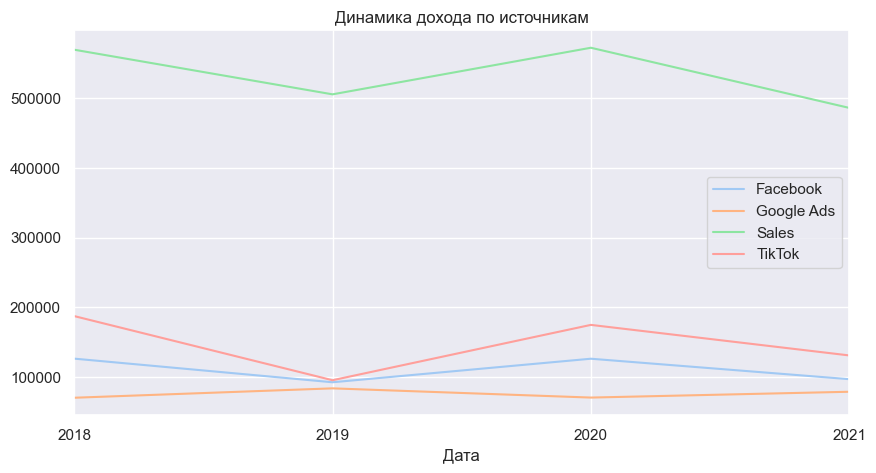

In [13]:
for i in range(income_dynamics.shape[0]):
    income_dynamics.iloc[i].plot(kind='line')
plt.legend()
plt.title("Динамика дохода по источникам")

plt.show()

### Выводим в удобный формат в Excel

In [14]:
# функция для генерации имени файла
def generate_name_file(name_file: str) -> str:
    """Функция проверяет существование файла с полученным именем
    чтобы избежать замены старого файла с таким же названием на новый.
    Если файла с заданным именем нет, то сохраняет его.
    Если такой файл есть, то добавляет порядковы номер в конце названия файла
    пока не создаст уникальное имя для файла

     ---parameters---
    На вход ожидает 1 параметр:
    name_file - название файла в формате str

    ---return---
    name_file - уникальное (свободное) имя файла, 
                которое не занято в файловой системе
    """
    
    # извлекаем из name_file имя файла и расширение
    filename, extension = os.path.splitext(name_file)
    
    # заводим счетчик порядкого номера для добавления в имя файла
    counter = 1
    
    while os.path.exists(name_file):
        # формируем имя файла с порядковым номером
        name_file = f"{filename} ({str(counter)}){extension}"
        counter += 1
    
    # возвращаем уникальное имя файла
    return name_file

In [15]:
# сохраняем данные в файл Excel
income_dynamics.to_excel(
    # вызываем функцию generate_name_file для генерации имени файла
    generate_name_file("Динамика дохода по источникам по годам.xlsx"), 
    sheet_name="Сводная таблица",
)

## Задача 2

- Написать 2 класса, первый - делает запросы, второй преобразует запрос в Dataframe
- Сделать 3 запроса и сформировать таблицу
- Вывести таблицу в сортировке по цене
- Выведи в удобный формат в Excel


- Endpoint
https://api.binance.com/api/v3/ticker/price

Query params:

symbol - string

1. BNBBTC
2. ETHBTC
3. LTCBTC


### Создаем 2 класса, первый - делает запросы, второй преобразует запрос в Dataframe

In [16]:
class RequestMaker:
    """Класс для отправки запросов"""
    
    def __init__(self, url, value):
        """Инициализирует объект класса"""
        self.url = url
        self.value = value # искомое значение ключа symbol
        
    def get_request(self):
        """Отправляет GET-запрос по заданному URL
        и ищет совпадение заданного значения по ключу symbol
        в файле полученном файле json"""
        response = requests.get(self.url)
        for row in response.json():
            if row['symbol'] == self.value:
                return row

    
class ResponseToDataFrame:
    """Класс для преобразования данных в DataFrame"""

    def __init__(self, data):
        """Инициализирует объект класса"""
        self.data = data

    def converted_to_dataframe(self):
        """Преобразует ответ на запоос в DataFrame"""
        return pd.DataFrame([self.data])

### Делаем 3 запроса и формируем таблицу

In [17]:
# функция для формирования датафрейма по запросам
def get_responses_to_requests_binance(url: str, symbol_list: list):
    """Функция формирует DataFrame по полученным данным
    по запросам к URL bibance.
    Функция использует классы RequestMaker для направления GET-запроса
    и поиска нужной информации и класс ResponseToDataFrame 
    для формирования итогового датафрейма с найденной информацией.
    Функция фиксируем дату и время окончания формирования датафрейма.
    
     ---parameters---
    На вход ожидает 2 параметра:
    url - адрес ресурса bibance в формате str
    value - список искомых значений в формате str.
    
    ---return---
    df - загруженный датасет
    date_time_creation_df - время окончания формирования датафрейма
    """
    
    # формируем пустой датафрейм для сохранения результатов
    df = pd.DataFrame()

    # делаем запросы для каждого значения из списка symbol_list
    # и формируем один датафрейм с результатами запросов
    for value in symbol_list:
        request_maker = RequestMaker(url, value).get_request()
        converted = ResponseToDataFrame(request_maker).converted_to_dataframe()
        
        # присоединяем полученную информацию к датафрейму
        df = pd.concat(
            [df, converted]
        )
    
    # сохраняем время формирования датафрейма
    date_time_creation_df = datetime.datetime.now().strftime("%Y-%m-%d %H-%M-%S")
    
    # возвращаем итоговый датафрейм и время окончания его формирования  
    return df, date_time_creation_df

In [18]:
# задаем URL для отправки запроса
url = "https://api.binance.com/api/v3/ticker/price"

In [19]:
# задаем список искомых значений по ключу 'symbol'
symbol_list = [
    "BNBBTC",
    "ETHBTC",
    "LTCBTC"
]

In [20]:
# используем функцию для получения результатов по запросам
responses_to_requests_binance, date_time_creation_df = get_responses_to_requests_binance(
    url,
    symbol_list,
)

### Выводим таблицу, отсортированную по цене

In [21]:
# сохраняем отсортированную по цене таблицу
responses_to_requests_binance.sort_values(
    "price", 
    ascending=False, # в порядке убывания
    inplace=True,
)

# выводим на экран полученную таблицу
responses_to_requests_binance

,symbol,price
0,ETHBTC,0.03978000
0,BNBBTC,0.00884700
0,LTCBTC,0.00105900


### Выводим в удобный формат в Excel

In [22]:
# сохраняем данные в файл Excel 
# с указанием даты и времени окончания формирования датафрейма
# в имени файла
responses_to_requests_binance.to_excel(
    f"Результаты запросов к binance {date_time_creation_df}.xlsx", 
    sheet_name="Итоговая таблица",
    index=False,     # убираем индексы
)

## Задача 3

- Сделать SQL запрос и объяснить последовательность действий планировщика


Представим, что есть таблица в marts.source_os(по структуре как таблица с предпоследнего пункта задачи 1)

- Нужно сделать запрос, который вернёт такую таблицу:
OS|сумма дохода|сумма дохода всего|процент от всего дохода

```sql
-- считаем общий доход
WITH total_revenue AS
  (SELECT SUM(revenue) AS sum_total
   FROM marts.source_os), 
   
-- группируем доход по операционным системам
 os_group AS
  (SELECT os,
          SUM(revenue) AS sum_os
   FROM marts.source_os
   GROUP BY os) 
   
-- собираем общую таблицу
SELECT os,
       sum_os,
       -- довавляем значение общего дохода из CTE total_revenue
       (SELECT sum_total
        FROM total_revenue) AS sum_total, 
       -- считаем процент дохода по операционным системам от общего дохода
       sum_os / (SELECT sum_total
                 FROM total_revenue) * 100 AS percent
FROM os_group;
```

SQL-запрос использует два обобщенных табличных выражения (CTE):
- `total_revenue` - для расчета общей дохода 
- `os_group` - для группировки доходов по операционным системам. 

Порядок выполнения SQL-запроса:
1. Рассчитывается общий доход - суммируются все доходы из таблицы `source_os` и результат сохраняется в CTE `total_revenue`.
2. Группируются доходы по операционным системам в CTE `os_group` из таблицы `source_os`.
3. Формируется итоговая таблица, где за основу берется CTE `os_group`. Для каждой операционной системы извлекатся операционная система и сумма дохода по этой операционной системе, общий доход из CTE `total_revenue` и рассчитывается процент дохода для этой операционной системы по сравнению с общим доходом.
4. Возвращается конечный результирующий набор со столбцами "os", "sum_os", "sum_total" и "percent".

## Задача 4

Сделать в любом удобном формате. 

Представлена выгрузка о полученных событиях приложения Х при показе рекламы источником У.  
Условиями договора с рекламодателем определено, что оплачиваются только события, по которым от даты установки до события прошло не более 2 суток.  
Ставка за событие составляет: 200 у.е. по Сан-Паулу и 100 у.е. по остальным городам. Adset 2 не оплачивается.  
\
Определить сумму, которую рекламодатель выплатит по результатам данной рекламной компании.

In [23]:
# функция для загрузки данных
def dawnload_df_excel(local_file: str, sheet_name: str) -> pd.DataFrame:
    """Функция для загрузки данных из файла Excel.
        
    ---parameters---
    На вход ожидает 2 параметра:
    local_file - путь к локальному файлу 
    sheet_name - название листа.
    
    Функция проверят существование полученного пути в файловой системе.
    Если local_file ссылается на существующий путь, 
    то функция загружает данные и возвращает датасет.
    В случае ошибки функция печатает сообщение об ошибке загрузки данных.
    
    ---return---
    df_local_file - загруженный датасет
    """
    # проверяем корректность пути к локальному файлу
    if os.path.exists(local_file):
        df_local_file = pd.read_excel(local_file, sheet_name=sheet_name)
        print("Датасет успешно загружен")

        return df_local_file
    else:
        print("Ошибка при загрузке датасета. Проверь передаваемые аргументы.")

In [24]:
# сохраняем путь к файлу xlsx и название нужного листа
local_file = "C:/Users/enygi/DS/Test/MGCOM/Тестовое _ HH Analyst.xlsx"
sheet_name = "Задание 4"

# загружаем данные
df_promotional_events = dawnload_df_excel(local_file, sheet_name)

Датасет успешно загружен


In [25]:
# смотрим информацию по датасету
df_info(df_promotional_events)


Размер датасета 
Датасет состоит из 169 наблюдений и 4 признаков




Десять первых наблюдений 


,Install Time,Event Time,Adset,City
0,2022-04-13 01:24:51,2022-04-14 22:50:41,17,Petropolis
1,2022-04-14 02:27:21,2022-04-14 21:10:55,17,Otelo
2,2022-04-13 01:44:29,2022-04-14 19:57:33,17,Teresopolis
3,2022-04-14 01:51:29,2022-04-14 17:56:18,17,Penapolis
4,2022-04-14 16:30:48,2022-04-14 16:37:11,17,Guapo
5,2022-04-12 00:29:21,2022-04-14 15:42:45,17,Manaus
6,2022-04-13 01:43:24,2022-04-14 12:33:24,17,Senhor Do Bonfim
7,2022-04-14 00:53:09,2022-04-14 12:28:23,17,Sooretama
8,2022-04-14 02:18:35,2022-04-14 04:51:57,17,Catanduvas
9,2022-04-14 03:53:13,2022-04-14 03:56:07,17,Cristalina



Десять случайных наблюдений 


,Install Time,Event Time,Adset,City
10,2022-04-14 01:40:46,2022-04-14 01:57:53,17,Aracatuba
145,2022-04-06 17:17:52,2022-04-07 09:48:10,5,Santa Luzia
1,2022-04-14 02:27:21,2022-04-14 21:10:55,17,Otelo
160,2022-04-06 15:46:31,2022-04-06 15:49:23,5,Paicandu
105,2022-04-08 03:30:06,2022-04-08 18:47:54,15,Guarulhos
147,2022-04-06 15:36:58,2022-04-07 07:13:46,5,Toledo
91,2022-04-09 02:51:19,2022-04-09 02:53:56,17,Rondon
129,2022-04-08 02:04:53,2022-04-08 02:08:07,17,Candido Mendes
68,2022-04-10 15:22:45,2022-04-10 15:31:55,17,Luziania
71,2022-04-08 02:25:18,2022-04-10 14:12:09,11,Rio De Janeiro



Десять последних наблюдений 


,Install Time,Event Time,Adset,City
159,2022-04-06 15:49:02,2022-04-06 15:51:43,5,Sao Paulo
160,2022-04-06 15:46:31,2022-04-06 15:49:23,5,Paicandu
161,2022-04-06 12:09:46,2022-04-06 12:13:04,1,Sumare
162,2022-04-06 03:07:53,2022-04-06 03:13:24,1,Guaruja
163,2022-04-06 01:40:46,2022-04-06 01:54:16,2,Aguas Lindas De Goias
164,2022-04-06 00:41:18,2022-04-06 01:23:03,2,Aquiraz
165,2022-04-05 21:30:48,2022-04-05 21:38:52,2,Santa Adelia
166,2022-04-05 01:09:22,2022-04-05 01:24:41,1,Florianopolis
167,2022-04-04 11:55:12,2022-04-04 11:59:14,1,Formosa
168,2022-04-04 10:37:39,2022-04-04 10:45:47,1,Macae





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Install Time  169 non-null    datetime64[ns]
 1   Event Time    169 non-null    datetime64[ns]
 2   Adset         169 non-null    int64         
 3   City          169 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 5.4+ KB



Описательная статистика 


,Install Time,Event Time,Adset
count,169,169,169.00
mean,2022-04-09 12:13:21.662722048,2022-04-10 00:42:23.023668480,12.21
min,2022-04-04 10:37:39,2022-04-04 10:45:47,1.00
25%,2022-04-08 00:12:35,2022-04-08 02:39:08,5.00
50%,2022-04-09 01:19:34,2022-04-09 14:17:53,17.00
75%,2022-04-11 02:43:04,2022-04-12 00:40:26,17.00
max,2022-04-14 16:30:48,2022-04-14 22:50:41,19.00
std,NaN,NaN,5.77





Количество уникальных значений в каждом признаке 


Install Time    169
Event Time      169
Adset            10
City            137
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


In [26]:
# формируем новый столбец less_two_days с количеством дней
# между датой события 'Event Time' и датой регистрации 'Install Time'
df_promotional_events["less_two_days"] = (
    df_promotional_events['Event Time'] - df_promotional_events['Install Time']
).dt.days

# первое условие - между датой события 'Event Time' и датой регистрации 'Install Time'
# должно пройти меньше 2 суток
mask_1 = df_promotional_events["less_two_days"] < 2

# второе условие - оставляем события, где значение Adset != 2
mask_2 = df_promotional_events["Adset"] != 2

# фильтруем датасет по двум условиям
df_promotional_events_filtered = df_promotional_events[(mask_1) & (mask_2)]

In [27]:
# функция для определения ставки за событие
def calculate_cost_event(city: str) -> int:
    """Функция определяет ставку за событие в зависимости от города.
    Если событие состоялось в городе Сан-Паулу, то его ставка равна 200 у.е.
    В остальных случаях ставка равна 100 у.е.
    
    ---parameters---
    На вход ожидает 1 параметр:
    city - город события в формате str
    
    ---return---
    Функция возвращает ставку в формате int
    """

    if city == "Sao Paulo":
        return 200
    else:
        return 100

In [28]:
# с помощью функции calculate_cost_event определяем ставки по всем события
# записываем результаты в новуй столбец 'Cost_event'
df_promotional_events_filtered['Cost_event'] = df_promotional_events_filtered['City'].map(calculate_cost_event)

In [29]:
# формируем итоговую сумму, которую выплатит рекламодатель
total_sum = df_promotional_events_filtered['Cost_event'].sum()
print(f"Рекламодатель выплатит {total_sum} у.е.")

# считаем конверсию в выплаты
cv = round(df_promotional_events_filtered.shape[0] / df_promotional_events.shape[0] * 100, 2)
print(f"Конверсия в выплаты составила {cv} %")

Рекламодатель выплатит 16500 у.е.
Конверсия в выплаты составила 89.94 %
